In [32]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [37]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [38]:
x_train.shape

(50000, 32, 32, 3)

In [39]:
x_test.shape

(10000, 32, 32, 3)

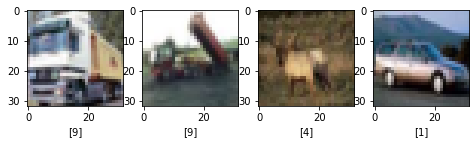

In [40]:
plt.figure(figsize=(10,4))
for i in range(1,5):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [42]:
x_train = x_train.reshape(50000,32,32,3).astype('float32')
x_test = x_test.reshape(10000,32,32,3).astype('float32')

In [43]:
x_train/=255
x_test/=255

In [44]:
x_train.shape

(50000, 32, 32, 3)

In [45]:
cnn = keras.Sequential()

In [47]:
cnn.add(layers.Conv2D(filters=32, activation = 'relu', kernel_size = (3,3),
                      input_shape = (32,32,3)))

In [49]:
cnn.add(layers.MaxPool2D((2,2)))

In [50]:
cnn.add(layers.Conv2D(filters=32, activation = 'relu', kernel_size = (3,3),
                      input_shape = (32,32,3)))

In [51]:
cnn.add(layers.MaxPool2D((2,2)))

In [52]:
cnn.add(layers.Flatten())

In [53]:
cnn.add(layers.Dense(64, activation = 'relu'))

In [54]:
cnn.add(layers.Dense(10, activation = 'softmax'))

In [55]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [56]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4849 - accuracy: 0.4631
Epoch 2/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1616 - accuracy: 0.5905
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0317 - accuracy: 0.6409
Epoch 4/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9527 - accuracy: 0.6663
Epoch 5/20
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8929 - accuracy: 0.6901
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8440 - accuracy: 0.7059
Epoch 7/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8015 - accuracy: 0.7209
Epoch 8/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7582 - accuracy: 0.7357
Epoch 9/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7235 - accuracy: 0.7485
Epoch 10/20
1563/1563 [==============================] - 57s 36m

In [57]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [92]:
y_pre = []
count = 0
for a, i in enumerate(y_pred):
    y_pre.append(np.argmax(i))
    if(np.argmax(i) == y_test[a]):
        count = count+1

In [93]:
y_pre = np.array(y_pre)

In [94]:
y_test = y_test.reshape(-1)

In [95]:
print(metrics.accuracy_score(y_test, y_pre))

0.6856


In [96]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [97]:
y_pre.astype('uint8')

array([6, 8, 8, ..., 5, 1, 7], dtype=uint8)